In [ ]:


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from os import listdir, getcwd, chdir
from os.path import isfile, join
import os

In [ ]:
workbookDir = getcwd()
print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

In [32]:
def process_multimodel_data(filelist, data_path):  
    mean_acc = []
    min_acc = []
    max_acc = []
    var_acc = []
    stdev_acc = []

    mean_traj_count = []
    min_traj_count = []
    max_traj_count = []
    var_traj_count = []
    stdev_traj_count = []

    mean_frames = []
    # min_frames = []
    # max_frames = []
    # var_frames = []
    # stdev_frames = []

    for file in filelist:
        df = pd.read_csv(data_path + file)
        mean_acc.append(df['Accuracies'].mean())
        min_acc.append(df['Accuracies'].min())
        max_acc.append(df['Accuracies'].max())
        var_acc.append(df['Accuracies'].var())
        stdev_acc.append(df['Accuracies'].std())

        mean_traj_count.append(df['Trajectory Count'].mean())
        min_traj_count.append(df['Trajectory Count'].min())
        max_traj_count.append(df['Trajectory Count'].max())
        var_traj_count.append(df['Trajectory Count'].var())
        stdev_traj_count.append(df['Trajectory Count'].std())

        raw_frames = extract_string_from_df(df, 'Frames')
        mean_frames.append(np.array(raw_frames).mean())
           
        result = {'mean_acc': mean_acc, 
              'min_acc': min_acc, 
              'max_acc': max_acc, 
              'var_acc': var_acc, 
              'stdev_acc': stdev_acc, 
              'mean_traj_count': mean_traj_count, 
              'min_traj_count': min_traj_count,
              'max_traj_count': max_traj_count,
              'var_traj_count': var_traj_count,
              'stdev_traj_count': stdev_traj_count,
              'mean_frames': mean_frames,
            #   'min_frames': min_frames,
            #   'max_frames': max_frames,
            #   'var_frames': var_frames,
            #   'stdev_frames': stdev_frames
              }
    return result
    

# Dataset #1: Age data, P14, P35, and P70

In [16]:
dataset_path_age = workbookDir + '/data/age_traj_count_outputs/'
age_data_filelist = ['one_files_run_data.csv',
            'two_file_run_data.csv',
            'three_file_run_data.csv',
            'four_file_run_data.csv',
            'five_file_run_data.csv',
            'six_file_run_data.csv',
            'seven_file_run_data.csv',
            'eight_file_run_data.csv',
            'nine_file_run_data.csv',
            'ten_file_run_data.csv',
            'eleven_file_run_data.csv',
            'twelve_file_run_data.csv',
            'thirteen_files_run_data.csv',
            'fourteen_files_run_data.csv',
            'fifteen_files_run_data.csv',
]

In [19]:
age_data_dict = process_multimodel_data(age_data_filelist, dataset_path_age)

KeyError: 'frames'

In [ ]:
fig, ax = plt.subplots()
#ax.errorbar(traj_count_list, accuracy_list, yerr=stdev_list, fmt='-o')
ax.errorbar(np.arange(1,16), age_data_dict['mean_acc'], yerr=age_data_dict['stdev_acc'], fmt='-o')

# plt.scatter(x=traj_count_list, y=accuracy_list, c='m')
# plt.scatter(traj_count_list, min_acc, c='g')
# plt.scatter(traj_count_list, max_acc, c='b')
plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Number of files')
plt.title('Mean accuracy across 100 models')

In [ ]:
fig, ax = plt.subplots()
plt.scatter(x=age_data_dict['mean_traj_count'], y=age_data_dict['mean_acc'], c='m', label='Mean')
plt.scatter(x=age_data_dict['mean_traj_count'], y=age_data_dict['min_acc'], c='g', label='Min')
plt.scatter(x=age_data_dict['mean_traj_count'], y=age_data_dict['max_acc'], c='b', label='Max')

plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')


In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(age_data_dict['mean_acc'])):
    plt.scatter(age_data_dict['stdev_acc'][i], age_data_dict['mean_acc'][i], label=age_data_dict['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Variance for random file subsets')

# Dataset 2: region data (all regions)

In [ ]:
dataset_path_region = workbookDir + '/data/region_traj_count_outputs/'
region_filelist = ['one_file_run_data.csv',
            'two_file_run_data.csv',
            'three_file_run_data.csv',
            'four_file_run_data.csv',
            'five_file_run_data.csv',
            'six_file_run_data.csv']

In [ ]:
region_data_dict = process_multimodel_data(region_filelist, dataset_path_region)

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(region_data_dict['mean_traj_count'], region_data_dict['mean_acc'], yerr=region_data_dict['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 100 models')

In [ ]:
fig, ax = plt.subplots()
plt.scatter(x=region_data_dict['mean_traj_count'], y=region_data_dict['mean_acc'], c='m', label='Mean')
plt.scatter(region_data_dict['mean_traj_count'], region_data_dict['max_acc'], c='g', label='Max')
plt.scatter(region_data_dict['mean_traj_count'], region_data_dict['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(region_data_dict['mean_acc'])):
    plt.scatter(region_data_dict['stdev_acc'][i], region_data_dict['mean_acc'][i], label=region_data_dict['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard Deviation for random file subsets')

# Dataset #3: Using average of 500 models instead of 100 on region data

In [ ]:
region_500model_filelist = ['region500model_1file_run_data.csv', 
                            'region500model_2file_run_data.csv',
                            'region500model_3file_run_data.csv',
                            'region500model_4file_run_data.csv',
                            'region500model_5file_run_data.csv',
                            'region500model_6file_run_data.csv'
                            ]

In [ ]:
path_to_data = '/Users/nelsschimek/Documents/Nance Lab/diff_predictor/data/region_500models_traj_count_outputs/'
result = process_multimodel_data(region_500model_filelist, path_to_data)

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(result['mean_traj_count'], result['mean_acc'], yerr=result['stdev_acc'], fmt='-o')
#ax.errorbar(np.arange(1,7), accuracy_list, yerr=stdev_list, fmt='-o')

# plt.scatter(x=traj_count_list, y=accuracy_list, c='m')
# plt.scatter(traj_count_list, min_acc, c='g')
# plt.scatter(traj_count_list, max_acc, c='b')
plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

In [ ]:
fig, ax = plt.subplots()
plt.scatter(x=result['mean_traj_count'], y=result['mean_acc'], c='m', label='Mean')
plt.scatter(result['mean_traj_count'], result['max_acc'], c='g', label='Max')
plt.scatter(result['mean_traj_count'], result['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(result['mean_acc'])):
    plt.scatter(result['stdev_acc'][i], result['mean_acc'][i], label=result['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard Deviation for random file subsets')

# Dataset #4: age data averaged over 500 models

In [ ]:
age_500model_dataset_path = workbookDir + '/data/age_500models_traj_count_outputs/'
age_500model_filelist = ['age_500model_1file_run_data.csv',
                            'age_500model_2file_run_data.csv',
                            'age_500model_3file_run_data.csv',
                            'age_500model_4file_run_data.csv',
                            'age_500model_5file_run_data.csv',
                            'age_500model_6files_run_data.csv',
                            'age_500model_7files_run_data.csv',
                            'age_500model_8files_run_data.csv',
                            'age_500model_9files_run_data.csv',
                            'age_500model_10files_run_data.csv',
                            'age_500model_11files_run_data.csv',
                            'age_500model_12file_run_data.csv',
                            'age_500model_13file_run_data.csv',
                            'age_500model_14file_run_data.csv',
                            'age_500model_15file_run_data.csv',
                            ]

In [ ]:
age_500model_dc = process_multimodel_data(age_500model_filelist, age_500model_dataset_path)

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(age_500model_dc['mean_traj_count'], age_500model_dc['mean_acc'], yerr=age_500model_dc['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(age_500model_dc['mean_acc'])):
    plt.scatter(age_500model_dc['stdev_acc'][i], age_500model_dc['mean_acc'][i], label=age_500model_dc['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard Deviation for random file subsets')

# Dataset #5: 500 models on best 3 classes of region data
## Hippocampus, cortex, striatum

In [ ]:
region_hcs_path = workbookDir + '/data/region_hippo_cort_striat_traj_count_outputs/'
region_hip_cort_striat_filelist = ['region_hippo_cort_striat_500model_one_files.csv',
                                   'region_hippo_cort_striat_500model_two_files.csv',
                                   'region_hippo_cort_striat_500model_three_files.csv',
                                   'region_hippo_cort_striat_500model_four_files.csv',
                                   'region_hippo_cort_striat_500model_five_files.csv',
                                   'region_hippo_cort_striat_500model_six_files.csv'
                                   ]

In [ ]:
regions_hcs_dc = process_multimodel_data(region_hip_cort_striat_filelist, region_hcs_path)

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(regions_hcs_dc['mean_traj_count'], regions_hcs_dc['mean_acc'], yerr=regions_hcs_dc['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

In [ ]:
fig, ax = plt.subplots()
plt.scatter(x=regions_hcs_dc['mean_traj_count'], y=regions_hcs_dc['mean_acc'], c='m', label='Mean')
plt.scatter(regions_hcs_dc['mean_traj_count'], regions_hcs_dc['max_acc'], c='g', label='Max')
plt.scatter(regions_hcs_dc['mean_traj_count'], regions_hcs_dc['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(regions_hcs_dc['mean_acc'])):
    plt.scatter(regions_hcs_dc['stdev_acc'][i], regions_hcs_dc['mean_acc'][i], label=regions_hcs_dc['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard Deviation for random file subsets')

# Dataset #6: top two regions
## useful because we can now go up to 10 files

In [ ]:
region_cs_path = workbookDir + '/data/region_cort_striat_traj_count_outputs/'
region_cort_striat_filelist = ['region_cort_striat_500model_one_file.csv',
                                   'region_cort_striat_500model_two_files.csv',
                                   'region_cort_striat_500model_three_files.csv',
                                   'region_cort_striat_500model_four_files.csv',
                                   'region_cort_striat_500model_five_files.csv',
                                   'region_cort_striat_500model_six_files.csv',
                                   'region_cort_striat_500model_seven_files.csv',
                                   'region_cort_striat_500model_eight_files.csv',
                                   'region_cort_striat_500model_nine_files.csv',
                                   'region_cort_striat_500model_ten_files.csv'
                                   ]

In [ ]:
region_cs_dc = process_multimodel_data(region_cort_striat_filelist, region_cs_path)

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(region_cs_dc['mean_traj_count'], region_cs_dc['mean_acc'], yerr=region_cs_dc['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

In [ ]:
fig, ax = plt.subplots()
plt.scatter(x=region_cs_dc['mean_traj_count'], y=region_cs_dc['mean_acc'], c='m', label='Mean')
plt.scatter(region_cs_dc['mean_traj_count'], region_cs_dc['max_acc'], c='g', label='Max')
plt.scatter(region_cs_dc['mean_traj_count'], region_cs_dc['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(region_cs_dc['mean_acc'])):
    plt.scatter(region_cs_dc['stdev_acc'][i], region_cs_dc['mean_acc'][i], label=region_cs_dc['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard deviation for random file subsets')

# Dataset #7: regions hippo, gangl, thala
## all have 6 files

In [ ]:
region_hgt_path = workbookDir + '/data/region_hippo_gangl_thala_500model_traj_count_outputs/'
region_hippo_gangl_thala_filelist = ['region_hippo_gangl_thala_500model_one_file.csv',
                                   'region_hippo_gangl_thala_500model_two_files.csv',
                                   'region_hippo_gangl_thala_500model_three_files.csv',
                                   'region_hippo_gangl_thala_500model_four_files.csv',
                                   'region_hippo_gangl_thala_500model_five_files.csv',
                                   'region_hippo_gangl_thala_500model_six_files.csv'
                                   ]

In [ ]:
region_hgt_dc = process_multimodel_data(region_hippo_gangl_thala_filelist, region_hgt_path)

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(region_hgt_dc['mean_traj_count'], region_hgt_dc['mean_acc'], yerr=region_hgt_dc['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

In [ ]:
fig, ax = plt.subplots()
plt.scatter(x=region_hgt_dc['mean_traj_count'], y=region_hgt_dc['mean_acc'], c='m', label='Mean')
plt.scatter(region_hgt_dc['mean_traj_count'], region_hgt_dc['max_acc'], c='g', label='Max')
plt.scatter(region_hgt_dc['mean_traj_count'], region_hgt_dc['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(region_hgt_dc['mean_acc'])):
    plt.scatter(region_hgt_dc['stdev_acc'][i], region_hgt_dc['mean_acc'][i], label=region_hgt_dc['mean_traj_count'][i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard deviation for random file subsets')

# Dataset 8: all ages 
## Prior age plots were just p21, p35, p70

In [20]:
age_all_path = workbookDir + '/data/age_all_ages_traj_count_outputs/'
age_all_filelist = ['age_all_one_file_data.csv',
                    'age_all_two_file_data.csv',
                    'age_all_three_file_data.csv',
                    'age_all_four_file_data.csv',
                    'age_all_five_file_data.csv',
                    'age_all_six_file_data.csv',
                    'age_all_seven_file_data.csv',
                    'age_all_eight_file_data.csv',
                    'age_all_nine_file_data.csv',
                    'age_all_ten_file_data.csv',
                    'age_all_eleven_file_data.csv',
                    'age_all_twelve_file_data.csv',
                    'age_all_thirteen_file_data.csv',
                    'age_all_fourteen_file_data.csv',
                    'age_all_fifteen_file_data.csv']


In [33]:
age_all_dc = process_multimodel_data(age_all_filelist, age_all_path)

Text(0.5, 1.0, 'Mean accuracy across 500 models')

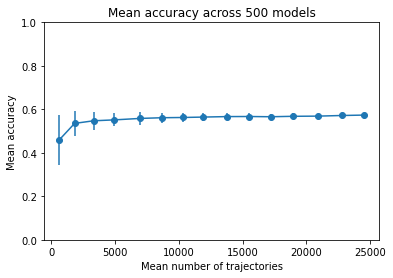

In [34]:
fig, ax = plt.subplots()
ax.errorbar(age_all_dc['mean_traj_count'], age_all_dc['mean_acc'], yerr=age_all_dc['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

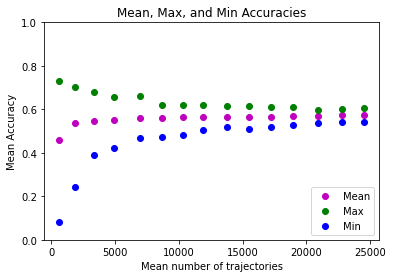

In [37]:
fig, ax = plt.subplots()
plt.scatter(x=age_all_dc['mean_traj_count'], y=age_all_dc['mean_acc'], c='m', label='Mean')
plt.scatter(age_all_dc['mean_traj_count'], age_all_dc['max_acc'], c='g', label='Max')
plt.scatter(age_all_dc['mean_traj_count'], age_all_dc['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(age_all_dc['mean_acc'])):
    plt.scatter(age_all_dc['stdev_acc'][i], age_all_dc['mean_acc'][i], label=age_all_dc['mean_traj_count'][i])
#plt.legend(loc='top', title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard deviation for random file subsets')

Text(0.5, 1.0, 'Mean accuracy across 500 models')

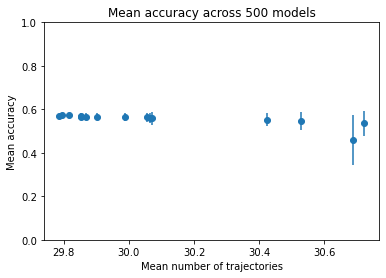

In [45]:
fig, ax = plt.subplots()
ax.errorbar(age_all_dc['mean_frames'], age_all_dc['mean_acc'], yerr=age_all_dc['stdev_acc'], fmt='o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

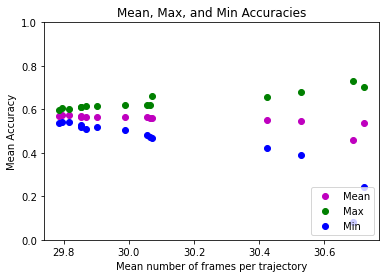

In [38]:
fig, ax = plt.subplots()
plt.scatter(x=age_all_dc['mean_frames'], y=age_all_dc['mean_acc'], c='m', label='Mean')
plt.scatter(age_all_dc['mean_frames'], age_all_dc['max_acc'], c='g', label='Max')
plt.scatter(age_all_dc['mean_frames'], age_all_dc['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of frames per trajectory')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

## I want to try and pull out individual classes

In [193]:
testdf = pd.read_csv(age_all_path + age_all_filelist[0])
testdf

,Accuracies,True Labels,Preds,Trajectory Count,Frames,dist_tot,dist_net
0,0.473469,[0. 4. 3. 4. 1. 1. 0. 4. 0. 3. 3. 4. 3. 1. 1. ...,"[0, 4, 3, 4, 2, 2, 2, 4, 3, 3, 3, 4, 4, 2, 0, ...",955,"[11.0, 19.0, 24.0, 46.0, 19.0, 13.0, 19.0, 22....","[1758.705789049034, 49561.23654532989, 19480.2...","[173.85773329686748, 2753.158453051233, 858.95..."
1,0.312500,[1. 2. 2. 0. 0. 1. 1. 1. 4. 3. 2. 4. 4. 2. 2. ...,"[3, 3, 3, 0, 1, 1, 2, 1, 4, 0, 1, 4, 1, 3, 3, ...",125,"[24.0, 19.0, 32.0, 39.0, 30.0, 16.0, 37.0, 20....","[28500.40395007936, 15779.445938230683, 53718....","[1236.8211092294712, 870.447930887721, 1742.63..."
2,0.375000,[1. 2. 2. 0. 0. 4. 3. 1. 0. 1. 4. 4. 2. 1. 3. ...,"[2, 3, 1, 0, 3, 0, 2, 1, 3, 1, 3, 3, 2, 0, 3, ...",125,"[19.0, 27.0, 63.0, 18.0, 43.0, 14.0, 121.0, 31...","[18444.28763544908, 49727.74917136272, 112046....","[1028.315733945143, 1912.8432030473264, 1810.9..."
3,0.585635,[3. 4. 1. 1. 0. 0. 3. 2. 3. 0. 1. 2. 1. 1. 0. ...,"[3, 4, 0, 1, 0, 3, 0, 3, 0, 0, 1, 2, 1, 1, 0, ...",730,"[13.0, 12.0, 59.0, 14.0, 13.0, 399.0, 39.0, 30...","[3642.273364836402, 23473.478232374426, 25341....","[309.6262507482087, 2130.068539070673, 463.925..."
4,0.504425,[1. 0. 0. 0. 0. 4. 1. 3. 0. 0. 3. 4. 2. 4. 1. ...,"[2, 0, 2, 0, 2, 4, 3, 3, 0, 0, 2, 4, 2, 4, 1, ...",435,"[13.0, 12.0, 59.0, 14.0, 13.0, 399.0, 39.0, 30...","[3642.273364836402, 23473.478232374426, 25341....","[309.6262507482087, 2130.068539070673, 463.925..."
...,...,...,...,...,...,...,...
495,0.222222,[1. 2. 2. 0. 0. 4. 2. 4. 4. 0. 1. 0. 1. 1. 0. ...,"[0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 1, 2, 4, ...",60,"[11.0, 19.0, 24.0, 46.0, 19.0, 13.0, 19.0, 22....","[1758.705789049034, 49561.23654532989, 19480.2...","[173.85773329686748, 2753.158453051233, 858.95..."
496,0.366667,[2. 3. 0. 1. 0. 4. 3. 1. 1. 2. 3. 2. 0. 1. 3. ...,"[2, 4, 3, 2, 4, 4, 2, 1, 2, 4, 2, 0, 0, 2, 4, ...",125,"[13.0, 27.0, 12.0, 51.0, 21.0, 40.0, 189.0, 53...","[3873.5279623033184, 25561.80053543264, 27262....","[312.74542596606574, 976.3921633252264, 2483.6..."
497,0.120000,[4. 4. 0. 4. 1. 4. 0. 3. 0. 4. 2. 2. 1. 2. 3. ...,"[0, 3, 1, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0, ...",85,"[14.0, 16.0, 14.0, 32.0, 13.0, 18.0, 22.0, 38....","[8877.471073327943, 33331.74203475706, 1207.71...","[694.7787251884323, 2224.2537847615995, 82.749..."
498,0.421053,[0. 4. 1. 0. 0. 3. 2. 2. 1. 2. 0. 0. 0. 1. 0. ...,"[2, 4, 3, 0, 3, 3, 2, 3, 1, 1, 4, 3, 0, 1, 4, ...",85,"[19.0, 27.0, 63.0, 18.0, 43.0, 14.0, 121.0, 31...","[18444.28763544908, 49727.74917136272, 112046....","[1028.315733945143, 1912.8432030473264, 1810.9..."


In [ ]:
testdf['dist_net'][499]

In [ ]:
def process_dist_cols():
    


In [200]:
from sklearn.metrics import jaccard_score
dist_tot_vals = []

thing = testdf['dist_tot'][i][1:(len(testdf['dist_tot'][i])-1)]
thing = thing.splitlines()
thing = thing[0].split(', ')
for val in thing:
    #print((val))
    if val != 'nan':
        dist_tot_vals.append(float(val))
    else:
        dist_tot_vals.append(0.0)
np.array(dist_tot_vals).mean()

# jacc_vals = jaccard_score(testdf['True Labels'], testdf['Preds'], average=None)
# jacc_vals

21161.5919863916

In [171]:
def process_labels(df, col_name):
        list_of_ints = []
        for i in range(0,len(df)):
                frames_string = df[col_name][i][1:(len(df[col_name][i])-1)]
                frames_lines = frames_string.splitlines()
                for line in frames_lines:
                        if col_name == 'True Labels':
                                line = line.split('. ')
                        elif col_name == 'Preds':
                                line = line.split(', ')
                        for val in line:
                                if len(val) == 1:
                                        list_of_ints.append(int(val))
                                elif val[0] == ' ':
                                        val = val[1]
                                        list_of_ints.append(int(val))
                                else:
                                        val = val[0]
                                        list_of_ints.append(int(val))
        return list_of_ints
        
        

In [175]:
dist_tot = process_labels(testdf, 'dist_tot')

ValueError: invalid literal for int() with base 10: '.'

In [174]:
true_labels = process_labels(testdf, 'True Labels')
print(len(true_labels))
preds = process_labels(testdf, 'Preds')
print(len(preds))
jaccard_score(true_labels, preds, average=None)

80739
80739


array([0.28501685, 0.42401444, 0.23976453, 0.17678444, 0.65810447])

In [ ]:
smaller_df = testdf.sample(250)

plt.scatter(smaller_df['Trajectory Count'], smaller_df['Accuracies'], s=0.5)

In [26]:
def extract_string_from_df(df, col_name):
    mean_frames = []



    subset_mean_frames_list = []

    for i in range(0,len(testdf)):
        frames_string = df[col_name][i][1:(len(df[col_name][i])-1)]
        frames_list = frames_string.split(",")
        list_of_floats = []
        #print(i)

        for val in frames_list:
            list_of_floats.append(float(val))
            #print(float(val))
        frames_array = np.array(list_of_floats)
        #print()
        mean_of_frames = frames_array.mean()
        
        subset_mean_frames_list.append(mean_of_frames)
            
            
            
        subset_mean_frames_array = np.array(subset_mean_frames_list)
        
        mean_frames.append(subset_mean_frames_array.mean())
    return mean_frames

    

In [47]:
dist_tot_vals = extract_string_from_df(testdf, 'Frames')

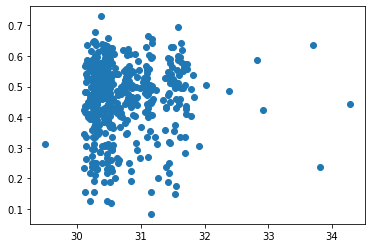

In [48]:
plt.scatter(dist_tot_vals, testdf['Accuracies'])

In [ ]:
plt.scatter(dist_tot_vals, testdf['Accuracies'])

# Dataset 9: age, P14 and P70 - easiest two to predict

In [ ]:
age_P14_P70_path = workbookDir + '/data/age_P14_P70_traj_count_outputs/'
age_P14_P70_filelist = ['age_500_model_one_file_data.csv',
                    'age_500_model_two_file_data.csv',
                    'age_500_model_three_file_data.csv',
                    'age_500_model_four_file_data.csv',
                    'age_500_model_five_file_data.csv',
                    'age_500_model_six_file_data.csv',
                    'age_500_model_seven_file_data.csv',
                    'age_500_model_eight_file_data.csv',
                    'age_500_model_nine_file_data.csv',
                    'age_500_model_ten_file_data.csv',
                    'age_500_model_eleven_file_data.csv',
                    'age_500_model_twelve_file_data.csv',
                    'age_500_model_thirteen_file_data.csv',
                    'age_500_model_fourteen_file_data.csv',
                    'age_500_model_fifteen_file_data.csv']

In [ ]:
age_P14_P70_dc = process_multimodel_data(age_P14_P70_filelist, age_P14_P70_path)

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(age_P14_P70_dc['mean_traj_count'], age_P14_P70_dc['mean_acc'], yerr=age_P14_P70_dc['stdev_acc'], fmt='-o')

plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

In [ ]:
fig, ax = plt.subplots()
plt.scatter(x=age_P14_P70_dc['mean_traj_count'], y=age_P14_P70_dc['mean_acc'], c='m', label='Mean')
plt.scatter(age_P14_P70_dc['mean_traj_count'], age_P14_P70_dc['max_acc'], c='g', label='Max')
plt.scatter(age_P14_P70_dc['mean_traj_count'], age_P14_P70_dc['min_acc'], c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

In [ ]:
age_P14_P70_dc['max_acc']

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(age_P14_P70_dc['mean_acc'])):
    plt.scatter(age_P14_P70_dc['stdev_acc'][i], age_P14_P70_dc['mean_acc'][i], label=age_P14_P70_dc['mean_traj_count'][i])
plt.legend(loc='best', title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard deviation for random file subsets')